Instituto Politécnico Nacional

Centro de Investigación en Computación

Minería de datos I

Análisis exploratorio de datos de trayectorias de albatros de Laysan

Presenta: Ana Maritza Bello

---

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Visualización de datos crudos

In [29]:
trajectories = pd.read_csv('../data/trajectories.csv')
trajectories.head()

,id,geom,date,latitude,longitude,name,season,spheroid_dist_to_colony,sst
0,1,POINT(-118.327013 29.110365),2014-01-19,29.110365,-118.32701,LAAL01,incubacion,0.0,17.581
1,2,POINT(-118.327008 29.110315),2014-01-19,29.110315,-118.32701,LAAL01,incubacion,0.0,17.581
2,3,POINT(-118.327022 29.11034),2014-01-19,29.110340,-118.32702,LAAL01,incubacion,0.0,17.581
3,4,POINT(-118.327045 29.110412),2014-01-19,29.110413,-118.32704,LAAL01,incubacion,0.0,17.581
4,5,POINT(-118.326942 29.110427),2014-01-19,29.110428,-118.32694,LAAL01,incubacion,0.0,17.581


# Tipos de datos en el dataset
Se tiene un total de 176767 puntos de ocurrencias de 47 aves marinas obtenidos
con GPS. Los datos son del año 2014 a 2018. Las variables con las que se cuentan
son la fecha de la ocurrencia, las coordenadas de latitud y longitud, el nombre
del individuo, la temporada reproductiva de la especie, la distancia de la
ocurrencia a la zona de anidamiento más cercana (Isla Guadalupe) y el valor de
la temperatura superficial del mar en el punto de ocurrencia.

Los datos de tipo object son cadenas de caracteres. La columna date es de tipo
datetime64[ns] y las demás son de tipo float64.


In [30]:
trajectories["date"] = trajectories["date"].astype("datetime64[ns]")
trajectories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176767 entries, 0 to 176766
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       176767 non-null  int64         
 1   geom                     176767 non-null  object        
 2   date                     176767 non-null  datetime64[ns]
 3   latitude                 176767 non-null  float64       
 4   longitude                176767 non-null  float64       
 5   name                     176767 non-null  object        
 6   season                   176767 non-null  object        
 7   spheroid_dist_to_colony  176767 non-null  float64       
 8   sst                      176766 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 12.1+ MB


# Cantidad de valores únicos en cada variable del dataset

Se tiene un total de 346 fechas registradas, 47 individuos, 4 temporadas
reproductivas y 5 años de registro. Las variables de latitud, longitud,
distancia y temperatura superficial del mar son medidas muy variadas, por esto
su cantidad de valores únicos es muy alta.

In [31]:
trajectories.nunique()

id                         176767
geom                       167663
date                          346
latitude                   114593
longitude                  110074
name                           47
season                          4
spheroid_dist_to_colony    148073
sst                         12291
dtype: int64

# Gráfica de la cantidad de datos disponibles por año y por mes

Saber la cantidad de puntos que se tienen por mes y por año es importante para
saber si se tienen suficientes datos para hacer un análisis por mes o por año.
En este caso, la cantidad de datos por mes es muy variable, por lo que si se
desea hacer un análisis de datos por mes, solo se tendría información disponible
de los primeros 3 o 4 meses dependiendo del año.

<Axes: title={'center': 'Numero de datos por mes y año'}, xlabel='Año, mes', ylabel='Cantidad de datos'>

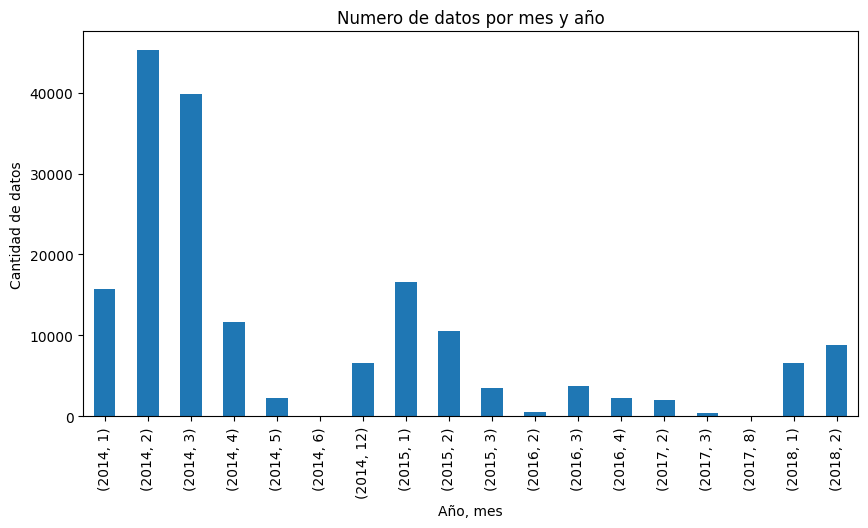

In [32]:
trajectories["day"] = trajectories["date"].dt.day
trajectories["month"] = trajectories["date"].dt.month
trajectories["year"] = trajectories["date"].dt.year
data_by_year = trajectories.groupby(["year", "month"]).size()
data_by_year.plot(kind="bar", figsize=(10, 5), 
                  title="Numero de datos por mes y año", 
                  xlabel="Año, mes", ylabel="Cantidad de datos")

<Axes: title={'center': 'Numero de datos por mes (todos los años)'}, xlabel='Mes', ylabel='Cantidad de datos'>

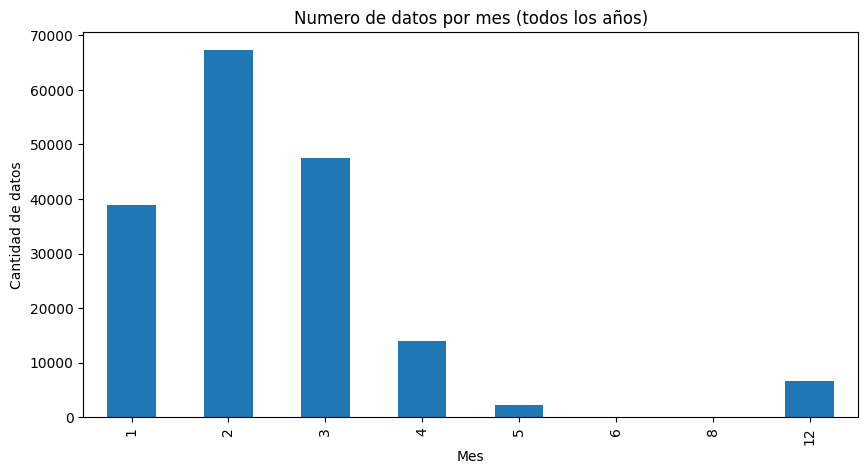

In [33]:
data_by_month = trajectories.groupby(["month"]).size()
data_by_month.plot(kind="bar", figsize=(10, 5), 
                  title="Numero de datos por mes (todos los años)", 
                  xlabel="Mes", ylabel="Cantidad de datos",)

Text(0.5, 1.0, 'Cantidad de datos disponibles por temporada reproductiva y año')

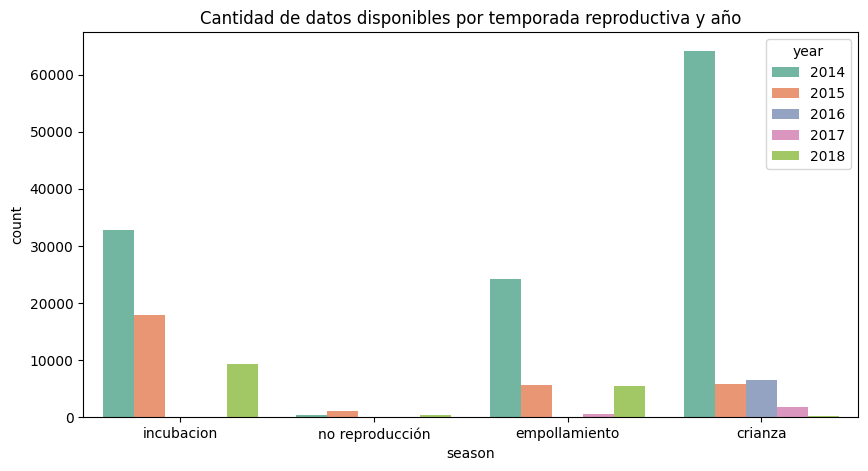

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(data=trajectories, x="season", hue="year", palette="Set2",)
plt.title("Cantidad de datos disponibles por temporada reproductiva y año")

In [35]:
sst_eda = trajectories["sst"].groupby(trajectories["month"])
sst_eda.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,38947.0,16.361966,2.819751,7.795,14.74000,17.686,18.1190,20.777
2,67238.0,16.806843,1.652451,6.641,16.40600,17.051,17.5540,20.613
3,47594.0,16.438794,2.278308,6.657,16.49800,17.214,17.5490,21.107
4,13968.0,16.138850,3.010759,5.705,16.42300,17.076,17.5050,21.405
5,2303.0,18.266947,0.518796,17.202,17.96750,18.224,18.4855,20.056
6,2.0,19.750000,0.000000,19.750,19.75000,19.750,19.7500,19.750
8,102.0,21.638618,0.164618,21.262,21.59075,21.706,21.7360,21.816
12,6612.0,18.496483,2.666654,8.227,19.01200,19.393,19.7970,20.732


# Gráficas del valor de la temperatura superficial del mar.

Estas gráficas muestran la distribución de los valores de la temperatura del mar
en los puntos de ocurrencia de las aves. Se puede observar que la preferencia de
estas aves es por temperaturas que vand desde los 5 grados centígrados
aproximadamente hasta los 25 grados centígrados.

Text(0, 0.5, 'SST (°C)')

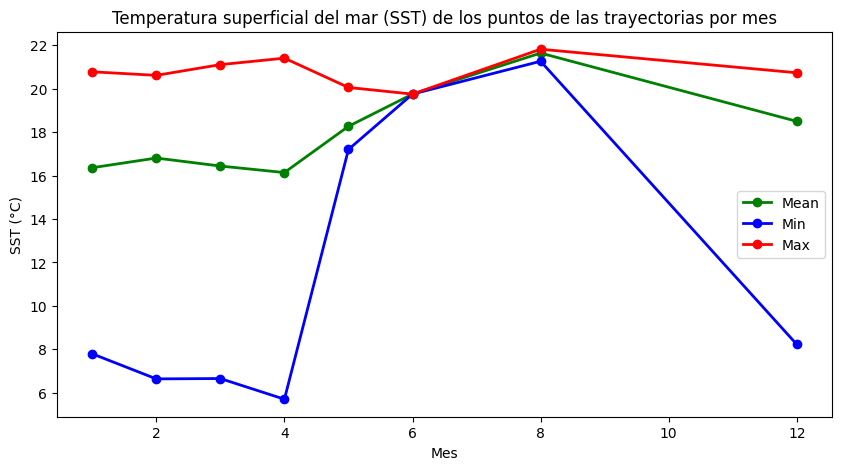

In [36]:
# Plot EDA for SST (Min, mean, max)

plt.figure(figsize=(10, 5))
plt.title("Temperatura superficial del mar (SST) de los puntos de las trayectorias por mes")
sst_eda.mean().plot(label="Mean", color="green", linewidth=2, marker="o")
sst_eda.min().plot(label="Min", color="blue", linewidth=2, marker="o")
sst_eda.max().plot(label="Max", color='red', linewidth=2, marker="o")
plt.legend()
plt.xlabel("Mes")
plt.ylabel("SST (°C)")


Text(0, 0.5, 'SST (°C)')

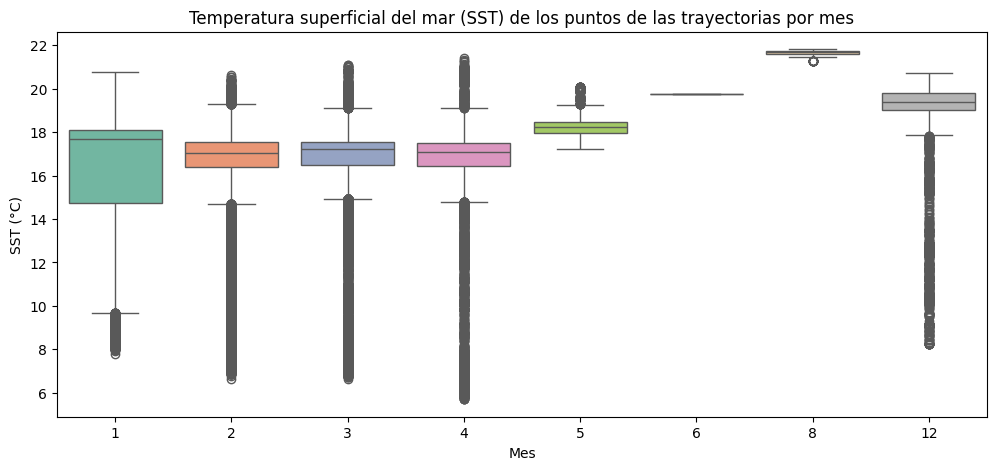

In [37]:
# Boxplots for SST by month

plt.figure(figsize=(12, 5))
plt.title("Temperatura superficial del mar (SST) de los puntos de las trayectorias por mes")
sns.boxplot(data=trajectories, x="month", y="sst", palette="Set2")
plt.xlabel("Mes")
plt.ylabel("SST (°C)")


# Distancia de los puntos de ocurrencia a la zona de anidamiento más cercana

In [38]:
distance_eda = trajectories["spheroid_dist_to_colony"].groupby(trajectories["month"])
distance_eda.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,38947.0,690.455467,981.642874,0.0,0.019047,0.086922,1303.820650,3895.649200
2,67239.0,252.214922,496.795611,0.0,0.046487,37.166943,227.645135,3474.546900
3,47594.0,362.253032,659.229383,0.0,57.874054,170.416355,239.247505,3577.749800
4,13968.0,537.811615,957.774851,0.0,45.881220,153.165930,225.560400,3528.655300
5,2303.0,112.398576,57.001763,0.0,65.148479,140.218960,158.741700,197.794570
6,2.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,102.0,0.117898,0.374290,0.0,0.000000,0.012286,0.026232,2.499353
12,6612.0,476.709914,924.170998,0.0,0.000000,0.019157,319.125998,3372.066200


Text(0, 0.5, 'Distancia (km)')

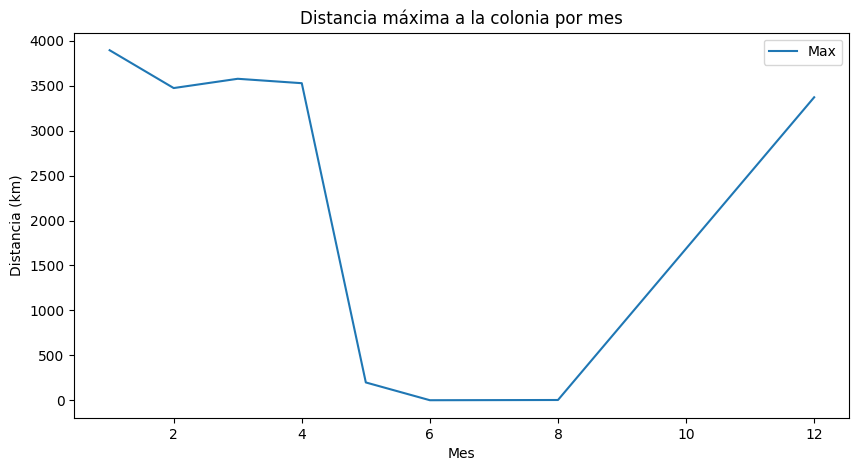

In [39]:
# Gráfica de la distancia a la colonia por mes (Min, mean, max)

plt.figure(figsize=(10, 5))
plt.title("Distancia máxima a la colonia por mes")
distance_eda.max().plot(label="Max")
plt.legend()
plt.xlabel("Mes")
plt.ylabel("Distancia (km)")


# Análisis exploratorio de datos de los valores de la longitud de las ocurrencias por temporada reproductiva

Este análisis nos siver para saber que tanto varía el área de distribución de
las aves por temporada reproductiva. Así, podemos saber la preferencia de
dispersión en longitud de las aves por temporada reproductiva.

In [40]:
latitude_bp = trajectories["longitude"].groupby(trajectories["season"])
latitude_bp.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
crianza,78656.0,-119.930254,6.512082,-152.48462,-118.988528,-118.290810,-116.732137,-114.42687
empollamiento,36047.0,-118.821732,1.987504,-134.77740,-118.667530,-118.291910,-118.291010,-115.08897
incubacion,60052.0,-123.130844,8.225292,-158.98053,-125.916035,-118.292080,-118.291480,-116.21005
no reproducción,2012.0,-122.608585,8.280744,-149.29865,-121.827005,-118.291918,-118.291440,-118.25123


# Análisis exploratorio de datos de los valores de la latitud de las ocurrencias por temporada reproductiva

Este análisis nos siver para saber que tanto varía el área de distribución de las aves por temporada reproductiva. Así, podemos saber la preferencia de dispersión en latitud de las aves por temporada reproductiva.

In [41]:
latitude_bp = trajectories["latitude"].groupby(trajectories["season"])
latitude_bp.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
crianza,78656.0,31.106044,4.513409,26.377728,28.884100,29.387503,30.636786,50.856987
empollamiento,36047.0,29.578935,1.661481,27.067830,28.883833,28.884655,29.816597,47.218990
incubacion,60052.0,32.050418,5.368645,25.933687,28.883862,28.884527,33.972980,51.257980
no reproducción,2012.0,31.281592,5.169273,27.298212,28.883812,28.884066,28.884655,44.503536


# Dispersión de los puntos de ocurrencia por temporada reproductiva

La dispersión de los puntos de ocurrencia por temporada reproductiva en el
espacio geográfico nos permite saber si las aves se distribuyen de manera
similar en las diferentes temporadas reproductivas. También nos permite
determinar zonas con mayor densidad de ocurrencias, esto es útil para
identificar áreas de importancia para las aves.

<Axes: xlabel='longitude', ylabel='latitude'>

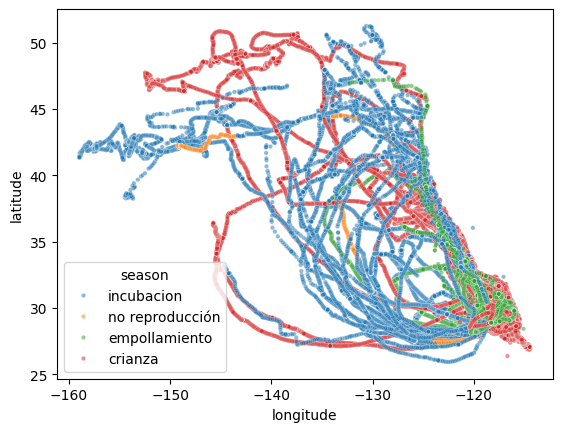

In [42]:
sns.scatterplot(data = trajectories, x="longitude", y="latitude", hue="season", alpha=0.5, s=10)

# Distribución geográfica durante la incubación

Text(0.5, 1.0, 'Boxplot de la longitud en la temporada de incubacion del año 2014')

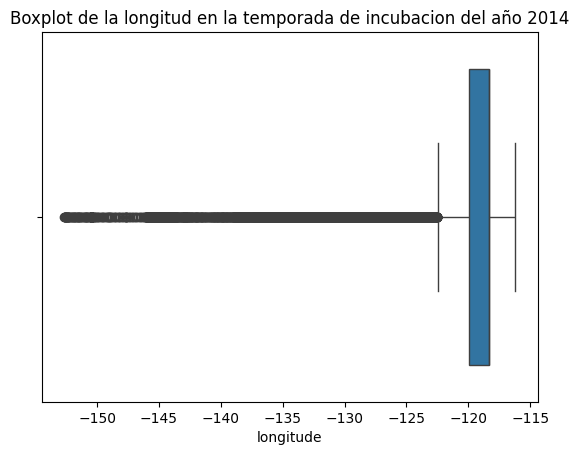

In [43]:
sns.boxplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2014)], x="longitude")
plt.title("Boxplot de la longitud en la temporada de incubacion del año 2014")

Text(0.5, 1.0, 'Boxplot de la longitud en la temporada de incubacion del año 2015')

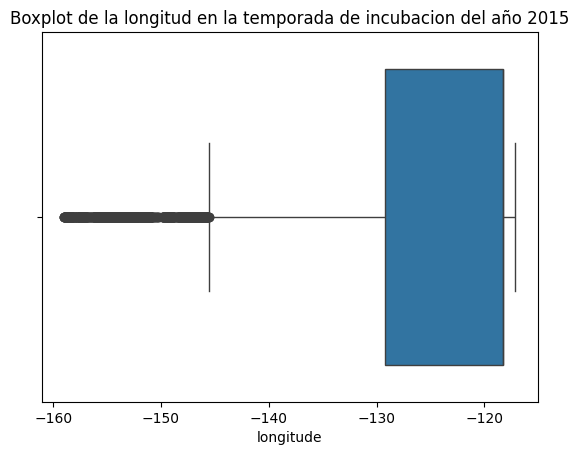

In [44]:
sns.boxplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2015)], x="longitude")
plt.title("Boxplot de la longitud en la temporada de incubacion del año 2015")

Text(0.5, 1.0, 'Histograma de la longitud en la temporada de incubacion del año 2014')

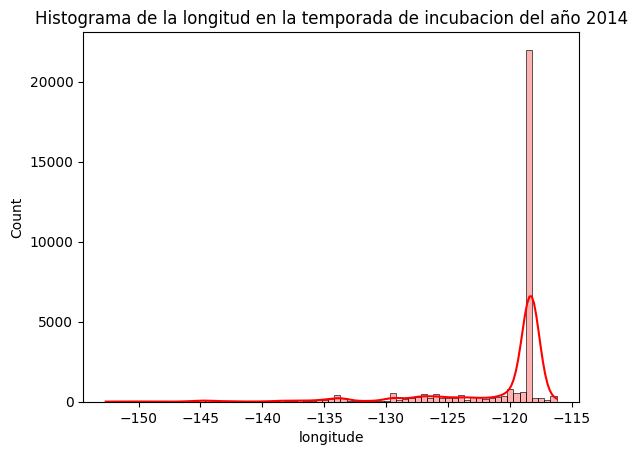

In [45]:
sns.histplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2014)],
             x="longitude", binwidth=0.5, kde=True, color="red", alpha=0.3)
plt.title("Histograma de la longitud en la temporada de incubacion del año 2014")

Text(0.5, 1.0, 'Boxplot de la latitud en la temporada de incubacion del año 2014')

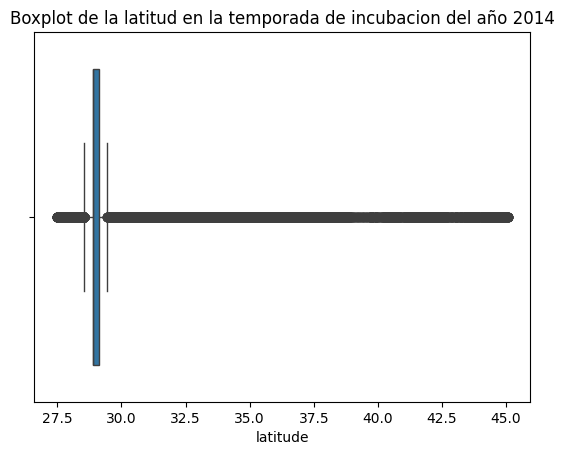

In [46]:
sns.boxplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2014)], x="latitude")
plt.title("Boxplot de la latitud en la temporada de incubacion del año 2014")

Text(0.5, 1.0, 'Boxplot de la latitud en la temporada de incubacion del año 2015')

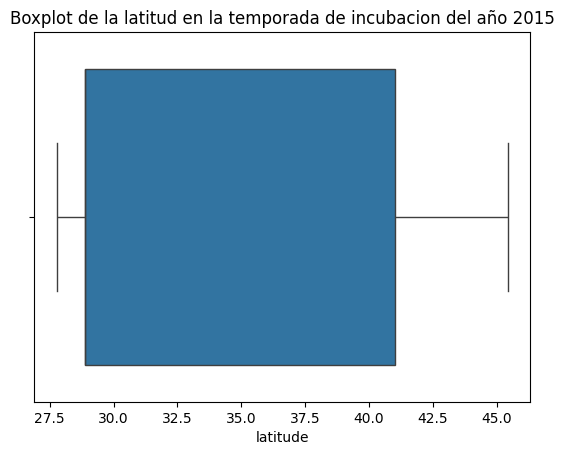

In [47]:
sns.boxplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2015)], x="latitude")
plt.title("Boxplot de la latitud en la temporada de incubacion del año 2015")

Text(0.5, 1.0, 'Histograma de la latitud en la temporada de incubacion')

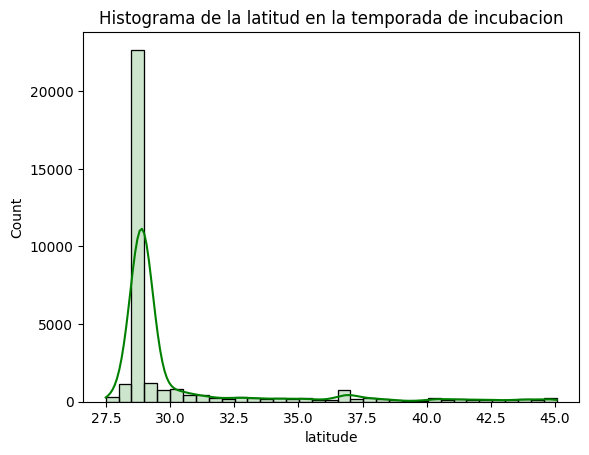

In [48]:
sns.histplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2014)],
             x="latitude", binwidth=0.5, kde=True, color="green", alpha=0.2)
plt.title("Histograma de la latitud en la temporada de incubacion")

# Distribución geográfica durante la crianza

Text(0.5, 1.0, 'Boxplot de la longitud en la temporada de crianza')

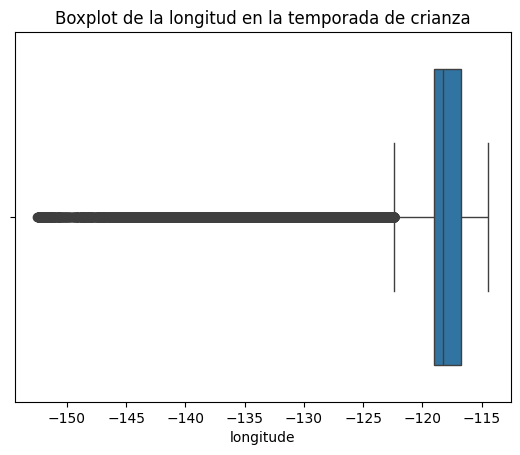

In [49]:
sns.boxplot(data = trajectories[trajectories["season"]=="crianza"], x="longitude")
plt.title("Boxplot de la longitud en la temporada de crianza")

Text(0.5, 1.0, 'Histograma de la longitud en la temporada de crianza')

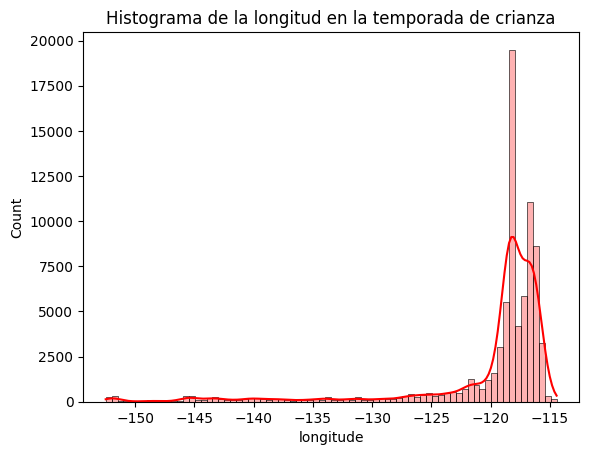

In [50]:
sns.histplot(data = trajectories[trajectories["season"]=="crianza"],
             x="longitude", binwidth=0.5, kde=True, color="red", alpha=0.3)
plt.title("Histograma de la longitud en la temporada de crianza")

Text(0.5, 1.0, 'Boxplot de la latitud en la temporada de crianza')

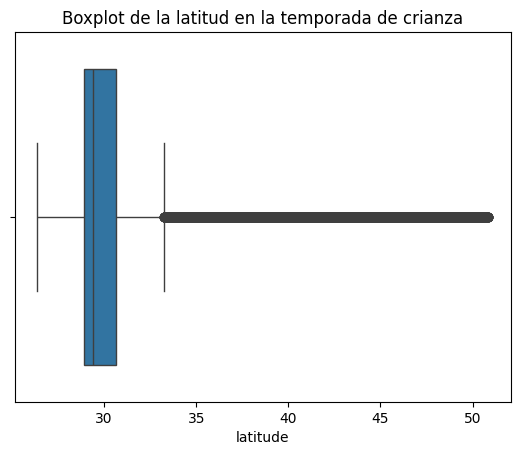

In [51]:
sns.boxplot(data = trajectories[trajectories["season"]=="crianza"], x="latitude")
plt.title("Boxplot de la latitud en la temporada de crianza")

Text(0.5, 1.0, 'Histograma de la latitud en la temporada de crianza')

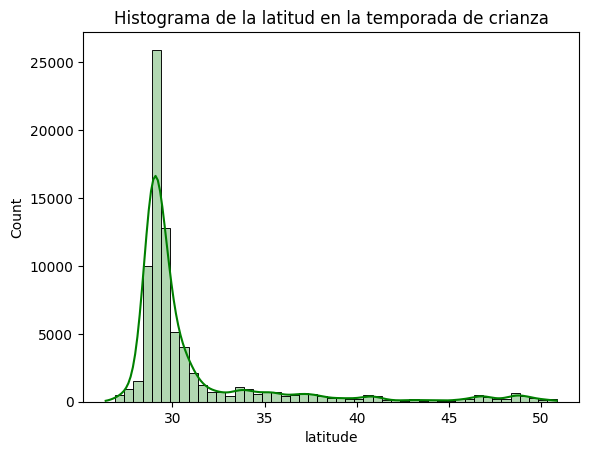

In [52]:
sns.histplot(data = trajectories[trajectories["season"]=="crianza"],
             x="latitude", binwidth=0.5, kde=True, color="green", alpha=0.3)
plt.title("Histograma de la latitud en la temporada de crianza")